In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [4]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [13]:
df.shape
df.columns
store1['sales'].describe()


count    91300.000000
mean        47.268379
std         24.006252
min          1.000000
25%         28.000000
50%         44.000000
75%         63.000000
max        155.000000
Name: sales, dtype: float64

In [107]:
dt.head()
dt.columns

Index(['id', 'date', 'store', 'item', 'sales'], dtype='object')

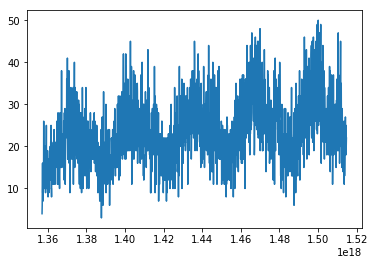

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_numeric(df['date'])
df.head()

store1= df[(df['store'] == 2) & (df['item'] == 5)]
plt.plot(store1['date'],store1['sales'])

In [81]:
Y=df['sales']
Y.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [82]:
df.columns
dt.columns


Index(['date', 'store', 'item', 'sales'], dtype='object')

In [95]:
features=['date','store','item']
X=df[features]
x_test=dt[features]

In [96]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
dt['date'] = pd.to_datetime(dt['date']) 
dt['date'] = pd.to_numeric(dt['date'])

In [99]:
y_prediction = regressor.predict(x_test)
y_prediction

array([64.76670281, 64.777407  , 64.78811118, ..., 60.22168029,
       60.23238447, 60.24308866])

In [102]:
dt['sales']=y_prediction
dt['date']=pd.to_datetime(dt['date'])
dt.head()

,id,date,store,item,sales
0,0,2018-01-01,1,1,64.766703
1,1,2018-01-02,1,1,64.777407
2,2,2018-01-03,1,1,64.788111
3,3,2018-01-04,1,1,64.798815
4,4,2018-01-05,1,1,64.809520


In [113]:
sl=dt[['id','sales']]

sl.to_csv("solution.csv", index = False)
